In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

Text(42, 25, 'Note: Circle size correlates with driver count per city.')

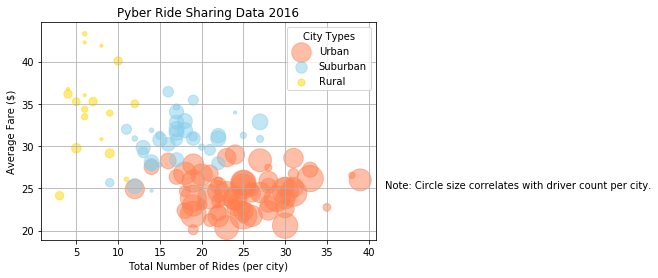

In [4]:
# Obtain the mean by city
grouped_city = combined_df.groupby('city').mean()
grouped_city.head()
# Obtain a value for the total number of rides by city
rides_by_city = combined_df["city"].value_counts()
# convert the returned series into a df
city_rides_df = rides_by_city.rename_axis('city').reset_index(name='Rides')
# merge the grouped by city df with the city ride count df
average_fare_df = pd.merge(grouped_city, city_rides_df, on="city")
average_fare_df.head()
#Obtain a data frame with city type and merge with data frame including ride count
no_repeat_city_df = combined_df.drop_duplicates(subset='city', keep="first")
dropped_no_repeat_city = no_repeat_city_df.drop(['fare', 'date', 'ride_id', 'driver_count'], axis=1)
city_type_df = pd.merge(dropped_no_repeat_city, average_fare_df, on="city")
city_type_df.head()

# Obtain the x and y coordinates for each of the three city types
# Urban plot
urban_df = city_type_df.loc[city_type_df["type"] == "Urban", :]
urban_df
urban_x = urban_df["Rides"]
urban_y = urban_df["fare"]
#Suburban x and y coordinates
suburban_df = city_type_df.loc[city_type_df["type"] == "Suburban", :]
suburban_x = suburban_df["Rides"]
suburban_y = suburban_df["fare"]
# Rural x and y coordinates
rural_df = city_type_df.loc[city_type_df["type"] == "Rural", :]
rural_x = rural_df["Rides"]
rural_y = rural_df["fare"]
# Variables for bubble size off driver_count
z_bub_urban = urban_df['driver_count']
z_bub_suburban = suburban_df['driver_count']
z_bub_rural = rural_df['driver_count']
# Plotting the scatter on the same chart
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(urban_x, urban_y, z_bub_urban*10, alpha=0.5, facecolors="coral", label = 'Urban')
ax1.scatter(suburban_x, suburban_y, z_bub_suburban*10, alpha=0.5, facecolors="SkyBlue", label = 'Suburban')
ax1.scatter(rural_x, rural_y, z_bub_rural*10, alpha=0.5, facecolors="gold", label = 'Rural')
# Adding Chart Titles
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
# Show Gridlines
ax1.grid(True)
# Create Legend
ax1.legend(title="City Types",loc='upper right')
ax1.text(42, 25, "Note: Circle size correlates with driver count per city.")

## Total Fares by City Type

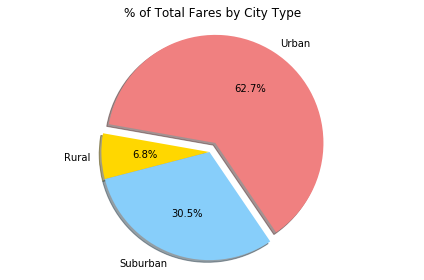

In [9]:
# Calculate Type Percents
combined_df.head()
grouped_type_sum = combined_df.groupby('type').sum()
grouped_type_sum_clean = grouped_type_sum.drop(['ride_id', 'driver_count'], axis=1)
grouped_type_sum_clean.head()
grouped_type_sum_final = grouped_type_sum_clean.reset_index()
grouped_type_sum_final.head()
# Build Pie Chart
colors = ["gold", "lightSkyBlue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(grouped_type_sum_final['fare'], explode=explode, labels=grouped_type_sum_final['type'], colors=colors, autopct="%1.1f%%",
       startangle=170, shadow=True)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
# Save Figure
plt.tight_layout()
plt.savefig("../Pyber/Total_fares_by_city_type.png")
plt.show()

## Total Rides by City Type

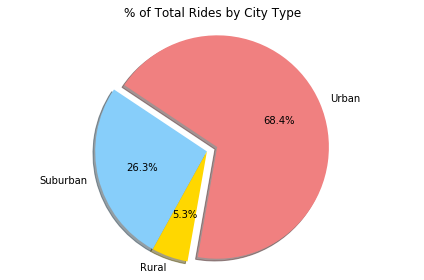

In [10]:
# Calculate Ride Percents
combined_df.head()
ride_counts = combined_df['type'].value_counts()
ride_counts_df = ride_counts.rename_axis('city type').reset_index(name='ride count')
ride_counts_df.head()
#Build Pie Chart
colors = ["lightcoral", "lightSkyBlue", "gold"]
explode = (0.1,0,0)
plt.pie(ride_counts_df['ride count'], explode=explode, labels=ride_counts_df['city type'], colors=colors, autopct="%1.1f%%",
       startangle=260, shadow=True)
plt.axis('equal')
plt.title("% of Total Rides by City Type")
# Save Figure
plt.tight_layout()
plt.savefig("../Pyber/Total_rides_by_city_type.png")
plt.show()

## Total Drivers by City Type

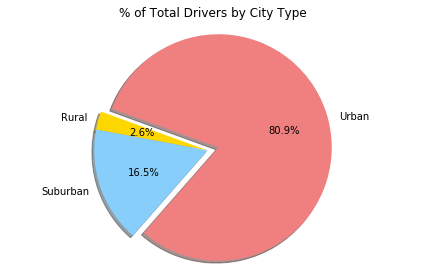

In [11]:
# Calculate Driver Percents
city_data_df.head()
driver_counts = city_data_df.groupby('type').sum()
driver_counts.head()
driver_counts_df = driver_counts.reset_index()
driver_counts_df.head()

# Build Pie Charts
colors = ["gold", "lightSkyBlue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(driver_counts_df['driver_count'], explode=explode, labels=driver_counts_df['type'], colors=colors, autopct="%1.1f%%",
       startangle=160, shadow=True)
plt.axis('equal')
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.tight_layout()
plt.savefig("../Pyber/Total_drivers_by_city_type.png")
plt.show()

In [ ]:
#Trend 1 - The most expensive fare types are those that occur in rural followed by suburban areas.

#Trend 2 - A lot can be observed by looking at the Total Fares by City Type ($) pie chart and Total Rides
#by City Type charts together. Urban areas actually have a lesser percentage of total fares than percentage
#of total rides while rurual and suburban areas have a higher percentage of total fares than percentage of 
#of total rides. This can be expected based on what was observed in Trend 1 (rural and suburban areas have
#have the highest average fare value.)

#Trend 3 - Most drivers are concentrated in Urban areas. This makes sense due to the relevancy of ride-sharing
#in urban areas.